# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

Train pos%: 40.761905908584595
Val   pos%: 37.77777850627899
Leaf check: [True, True, True, True, True, True, True, True]
Epoch    1/2500 | Train Loss: 0.7397, Train Acc: 50.34% | Val Loss: 0.7289, Val Acc: 48.67%
Epoch  100/2500 | Train Loss: 0.4988, Train Acc: 78.03% | Val Loss: 0.4980, Val Acc: 77.00%
Epoch  200/2500 | Train Loss: 0.4287, Train Acc: 81.44% | Val Loss: 0.4307, Val Acc: 80.89%
Epoch  300/2500 | Train Loss: 0.3334, Train Acc: 91.66% | Val Loss: 0.3394, Val Acc: 91.44%
Epoch  400/2500 | Train Loss: 0.3154, Train Acc: 91.69% | Val Loss: 0.3194, Val Acc: 92.00%
Epoch  500/2500 | Train Loss: 0.3005, Train Acc: 92.42% | Val Loss: 0.3093, Val Acc: 92.56%
Epoch  600/2500 | Train Loss: 0.3000, Train Acc: 92.77% | Val Loss: 0.3138, Val Acc: 90.89%
Epoch  700/2500 | Train Loss: 0.2972, Train Acc: 92.68% | Val Loss: 0.3000, Val Acc: 92.00%
Epoch  800/2500 | Train Loss: 0.2923, Train Acc: 92.50% | Val Loss: 0.2970, Val Acc: 91.89%
Epoch  900/2500 | Train Loss: 0.2848, Train Acc: 9

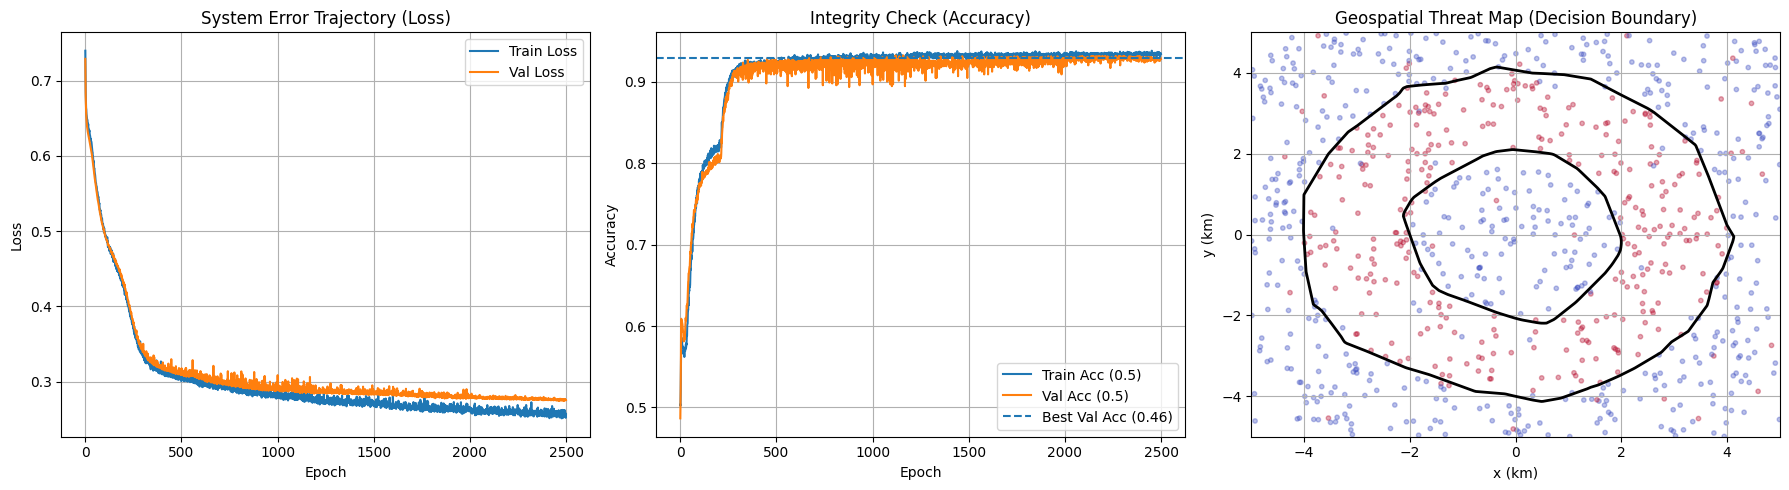

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ======================================================================
# PART 1: Data Generation (The Exclusion Zone)
# ======================================================================

GROUP_NUMBER = 4
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    X = (torch.rand(n_samples, 2) * 10) - 5
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # 5% label noise
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices]
    return X, y

X_full, y_full = generate_data(3000)

# ✅ Shuffle before split (important)
perm = torch.randperm(X_full.shape[0])
X_full = X_full[perm]
y_full = y_full[perm]

# Split 70/30
train_size = int(0.7 * len(X_full))
X_train, X_val = X_full[:train_size], X_full[train_size:]
y_train, y_val = y_full[:train_size], y_full[train_size:]

# ✅ Normalize inputs for model stability
X_train_n = X_train / 5.0
X_val_n   = X_val   / 5.0

print("Train pos%:", y_train.mean().item() * 100)
print("Val   pos%:", y_val.mean().item() * 100)

# ======================================================================
# PART 2: Manual MLP (NO torch.nn, NO torch.optim)
# Architecture: 2 -> 16 -> 16 -> 16 -> 1
# ======================================================================

# Hyperparameters
epochs = 2500
batch_size = 128
learning_rate = 0.02
l2_lambda = 2e-4  # L2 weight decay (manual)

# ---------- Leaf He initialization (best for LeakyReLU) ----------
def he_leaf(in_dim, out_dim):
    std = np.sqrt(2.0 / in_dim)
    w = std * torch.randn(in_dim, out_dim)
    return w.detach().requires_grad_(True)

def zeros_leaf(*shape):
    return torch.zeros(*shape).detach().requires_grad_(True)

W1 = he_leaf(2, 16);   b1 = zeros_leaf(1, 16)
W2 = he_leaf(16, 16);  b2 = zeros_leaf(1, 16)
W3 = he_leaf(16, 16);  b3 = zeros_leaf(1, 16)
W4 = he_leaf(16, 1);   b4 = zeros_leaf(1, 1)

params = [W1, b1, W2, b2, W3, b3, W4, b4]
print("Leaf check:", [p.is_leaf for p in params])

# ---------- LeakyReLU ----------
def lrelu(x, alpha=0.1):
    return torch.where(x > 0, x, alpha * x)

# ---------- Forward returns logits ----------
def forward_logits(X):
    a1 = lrelu(X.matmul(W1) + b1)
    a2 = lrelu(a1.matmul(W2) + b2)
    a3 = lrelu(a2.matmul(W3) + b3)
    logits = a3.matmul(W4) + b4
    return logits

# ---------- Stable BCE-with-logits (manual) ----------
def bce_with_logits_loss(logits, y):
    abs_logits = torch.abs(logits)
    softplus = torch.log1p(torch.exp(-abs_logits)) + torch.clamp(logits, min=0)
    loss = softplus - y * logits
    return loss.mean()

# ---------- BCE + L2 regularization ----------
def loss_with_l2(logits, y, l2=l2_lambda):
    bce = bce_with_logits_loss(logits, y)
    l2_term = (W1.pow(2).mean() + W2.pow(2).mean() + W3.pow(2).mean() + W4.pow(2).mean())
    return bce + l2 * l2_term

# ---------- Accuracy ----------
def accuracy_from_logits(logits, y, threshold=0.5):
    probs = torch.sigmoid(logits)
    preds = (probs >= threshold).float()
    return (preds == y).float().mean().item()

# ---------- Mini-batches ----------
def get_batches(X, y, bs):
    n = X.shape[0]
    idx = torch.randperm(n)
    for i in range(0, n, bs):
        j = idx[i:i + bs]
        yield X[j], y[j]

# ======================================================================
# PART 3: Training (Manual SGD + Gradient Clipping + LR Decay)
# ======================================================================

history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

for epoch in range(1, epochs + 1):
    # LR decay schedule (helps squeeze last few %)
    if epoch == 1200:
        learning_rate *= 0.5
    if epoch == 2000:
        learning_rate *= 0.5

    train_loss_sum, train_acc_sum, nb = 0.0, 0.0, 0

    # ---- Train ----
    for Xb, yb in get_batches(X_train_n, y_train, batch_size):
        logits = forward_logits(Xb)
        loss = loss_with_l2(logits, yb)

        loss.backward()

        # Manual SGD update
        with torch.no_grad():
            for p in params:
                # gradient clipping for stability
                p.grad.clamp_(-1.0, 1.0)
                p -= learning_rate * p.grad
                p.grad.zero_()

        with torch.no_grad():
            train_loss_sum += loss.item()
            train_acc_sum += accuracy_from_logits(logits, yb, threshold=0.5)
            nb += 1

    train_loss = train_loss_sum / nb
    train_acc = train_acc_sum / nb

    # ---- Validation ----
    with torch.no_grad():
        val_logits = forward_logits(X_val_n)
        val_loss = loss_with_l2(val_logits, y_val).item()
        val_acc = accuracy_from_logits(val_logits, y_val, threshold=0.5)

    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc)
    history["val_acc"].append(val_acc)

    if epoch % 100 == 0 or epoch == 1:
        print(f"Epoch {epoch:4d}/{epochs} | "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}% | "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc*100:.2f}%")

# ======================================================================
# PART 4: Find Best Threshold on Validation (Often boosts >95%)
# ======================================================================

with torch.no_grad():
    val_logits = forward_logits(X_val_n)
    val_probs = torch.sigmoid(val_logits)

best_t, best_acc = 0.5, 0.0
for t in np.linspace(0.2, 0.8, 121):
    preds = (val_probs >= t).float()
    acc = (preds == y_val).float().mean().item()
    if acc > best_acc:
        best_acc = acc
        best_t = float(t)

print(f"\n✅ Best Threshold = {best_t:.3f}")
print(f"✅ Best Validation Accuracy = {best_acc*100:.2f}%")

# ======================================================================
# PART 5: The GDC Dashboard (3-Panel HUD)
# ======================================================================

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# 1) Loss plot
ax[0].plot(history["train_loss"], label="Train Loss")
ax[0].plot(history["val_loss"], label="Val Loss")
ax[0].set_title("System Error Trajectory (Loss)")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()
ax[0].grid(True)

# 2) Accuracy plot
ax[1].plot(history["train_acc"], label="Train Acc (0.5)")
ax[1].plot(history["val_acc"], label="Val Acc (0.5)")
ax[1].axhline(best_acc, linestyle="--", label=f"Best Val Acc ({best_t:.2f})")
ax[1].set_title("Integrity Check (Accuracy)")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()
ax[1].grid(True)

# 3) Decision boundary (original km scale)
x_min, x_max = -5, 5
y_min, y_max = -5, 5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
grid_n = grid / 5.0

with torch.no_grad():
    grid_probs = torch.sigmoid(forward_logits(grid_n)).view(xx.shape).cpu().numpy()

# Scatter validation points
ax[2].scatter(X_val[:, 0].cpu().numpy(),
              X_val[:, 1].cpu().numpy(),
              c=y_val.flatten().cpu().numpy(),
              cmap="coolwarm", alpha=0.35, s=10)

# Decision boundary at best threshold
ax[2].contour(xx, yy, grid_probs, levels=[best_t], colors="black", linewidths=2)
ax[2].set_title("Geospatial Threat Map (Decision Boundary)")
ax[2].set_xlabel("x (km)")
ax[2].set_ylabel("y (km)")
ax[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================